In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib notebook

In [2]:
import ipywidgets as widgets
from ipywidgets import interactive

## Show top 50 players

In [3]:
df = pd.read_table("../output/player_ranks.txt", index_col=0).reset_index(drop=True)

In [4]:
menu = widgets.Dropdown(
    options=["all"] + df.race.unique().tolist(),
    value="all",
    description='Select race',
    disabled=False
)

def view(x=''):
    if x=='all': 
        qdf = df.copy()
    else:
        qdf = df.query("race == @x").reset_index(drop=True).copy()
        
    qdf.index = qdf.index + 1
    display(qdf[:50])

interactive(view, x=menu)

interactive(children=(Dropdown(description='Select race', options=('all', 'Wood Elves', 'Undead', 'Norse', 'Dark Elves', 'Skaven', 'Chaos Dwarves', 'Amazons', 'Necromantic', 'Lizardmen', 'Humans', 'Orc', 'Dwarves', 'Chaos Pact', 'High Elves', 'Slann', 'Elves', 'Khemri', 'Underworld', 'Vampires', 'Goblins', 'Chaos', 'Ogres', "Nurgle's Rotters", 'Halflings'), value='all'), Output()), _dom_classes=('widget-interact',))

## Look at phi distribution

To get a good idea of abilities of races, restrict to coaches that have a low phi.

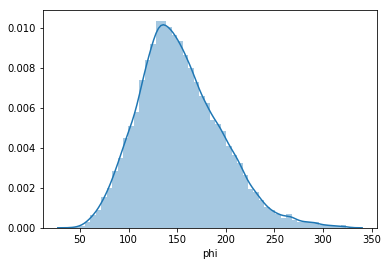

In [5]:
sns.distplot(df.phi)

In [6]:
low_phi_df = df.query("phi < 125")
low_phi_df.shape

(8400, 5)

In [7]:
ranked_medians = low_phi_df.groupby("race").value.aggregate("median").sort_values(ascending=False).index

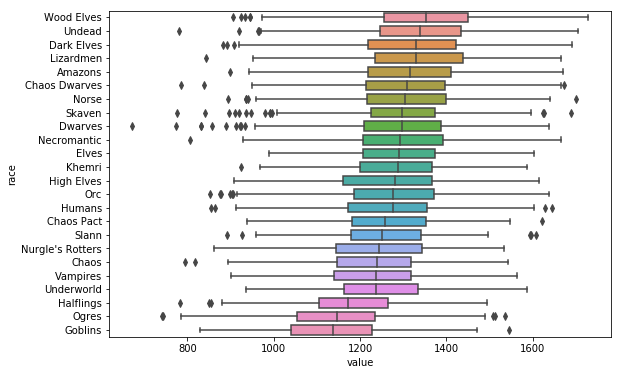

In [8]:
fig = plt.figure(figsize=(9, 6))
ax = sns.boxplot(y="race", x="value", width=0.7, data=low_phi_df, order=ranked_medians)

### Look at the ratings of the top 2.5% of players

Gives a good idea of what the best races are at higher standards.

In [9]:
low_phi_df.groupby("race").value.aggregate(lambda y: np.percentile(y, 97.5)).sort_values(ascending=False)

race
Dark Elves          1608.536187
Lizardmen           1601.776037
Wood Elves          1600.715850
Undead              1586.684250
Amazons             1574.198500
Dwarves             1558.982375
Skaven              1550.997313
Necromantic         1547.587400
Norse               1547.038150
Chaos Dwarves       1544.627150
Humans              1540.113300
Elves               1526.189000
Khemri              1509.485750
Orc                 1506.698500
Chaos Pact          1503.796625
Underworld          1501.881725
High Elves          1489.492500
Slann               1485.448050
Chaos               1476.134937
Vampires            1474.357225
Nurgle's Rotters    1474.002050
Ogres               1425.708000
Halflings           1397.021625
Goblins             1383.424263
Name: value, dtype: float64

## See where a player/race fits in to distribution

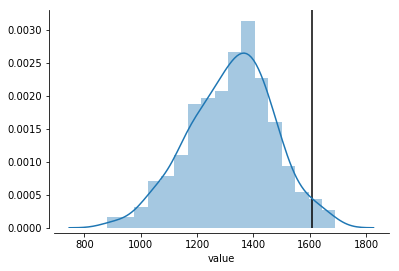

In [14]:
fig, ax = plt.subplots()
sns.despine(ax=ax, offset=5)
player, race = "mubo", "Dark Elves"

qdf = low_phi_df.query("race == @race")

ax = sns.distplot(qdf.value)
ax.vlines(list(qdf.query("coach==@player").value), 0, ax.get_ylim()[1])